In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from utils import theoretical_stepsize, gradient_descent, extragradient
import time

# Mixed Strategy game VI


Bilinear Objective where player x wants to minimize the amount it pays to the player y.

$$\min_x \max_y x P y$$

In [2]:
np.random.seed(0)
n, m = 2, 2
""" Return coordinate matrices from coordinate vectors. """
A = np.random.rand(n,m)
X, Y = np.meshgrid(np.linspace(-n, n, n), np.linspace(-n, n, n))
F_x = A.dot(Y)
F_y = -np.transpose(A).dot(X)
th_rate = theoretical_stepsize(A)

In [3]:
%%capture
fig1 = plt.figure(1, figsize=(8,8))
ax1 = fig1.gca()
ax1.quiver(X, Y, F_x, F_y, units='width',color='tab:gray', width=0.003)

In [4]:
# Gradient Descent
start_time = time.time()
x_rand, y_rand = np.random.uniform(size=n), np.random.uniform(size=m)
x_init, y_init = x_rand/np.sum(x_rand), y_rand/np.sum(y_rand)
x, y, iter = gradient_descent(A, x_init, y_init, ax1)
print("Solution for x:", x, ", solution for y:", y, ", iterations:", iter, ", time:", (time.time() - start_time), ".")

Solution for x: [-0.90358409 -0.51127083] , solution for y: [-0.17084399  0.05173758] , iterations: 199 , time: 0.0050067901611328125 .


In [5]:
# Extragradient Descent with theoretical step size
#start_time = time.time()
#x, y, iter = extragradient(A, n, x_init, y_init, th_rate, fig1, ax1)
#print("Solution for x:", x, ", solution for y:", y, ", iterations:", iter, ", time:", (time.time() - start_time), ".")

In [6]:
%%capture
fig2 = plt.figure(1, figsize=(8,8))
ax2 = fig2.gca()
ax2.quiver(X, Y, F_x, F_y, units='width',color='tab:gray', width=0.003)

Solution for x: [0.28594663 0.71405337] , solution for y: [0.73307134 0.26692866] , iterations: 40 , time: 1.4775233268737793 .


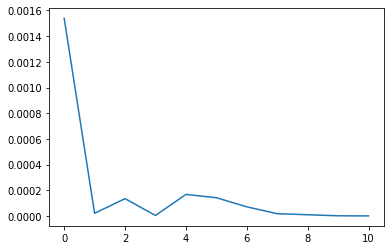

In [7]:
# Extragradient Descent with adaptive step size
start_time = time.time()
x, y, iter = extragradient(A, n, x_init, y_init, 0.02, fig2, ax2, adaptive = True)
print("Solution for x:", x, ", solution for y:", y, ", iterations:", iter, ", time:", (time.time() - start_time), ".")

In [8]:
%%capture
fig3 = plt.figure(1, figsize=(8,8))
ax3 = fig3.gca()
ax3.quiver(X, Y, F_x, F_y, units='width',color='tab:gray', width=0.003)

In [9]:
def projection_simplex_sort(y, d, z=1):
    """ Calculates the projection from point y onto a point x in the probability simplex. """
    u = np.sort(y)[::-1]
    cssv = np.cumsum(u) - z
    ind = np.arange(d) + 1
    cond = u - cssv / ind > 0
    rho = ind[cond][-1]
    theta = cssv[cond][-1] / float(rho)
    w = np.maximum(y - theta, 0)
    return w

Solution for x: [0.25622633 0.74377367] , solution for y: [0.75869028 0.24130972] , iterations: 104 , time: 0.1549072265625 .


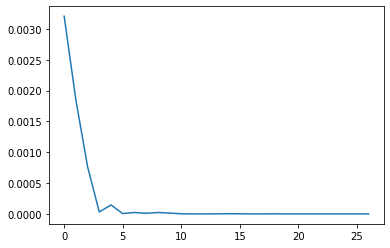

In [10]:
# Extragradient Descent with adaptive step size and explicit projection solution
start_time = time.time()
x, y, iter = extragradient(A, n, x_init, y_init, 0.02, fig2, ax2, adaptive = True, projection = projection_simplex_sort)
print("Solution for x:", x, ", solution for y:", y, ", iterations:", iter, ", time:", (time.time() - start_time), ".")